In [1]:
# Standard imports.
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
# Basic Analysis on dataset
fish = pd.read_csv('Fish.csv') 
fish.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [5]:
# Checking columns with datatypes
fish.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

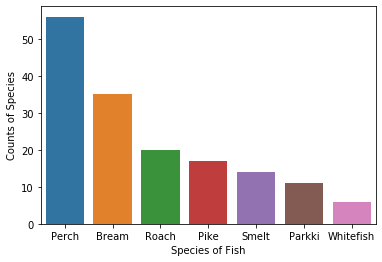

In [6]:
# Counts for each species
val_c = fish['Species'].value_counts()
val_c = pd.DataFrame(val_c)
sns.barplot(x=val_c.index, y=val_c['Species'])
plt.xlabel('Species of Fish')
plt.ylabel('Counts of Species')
plt.show()

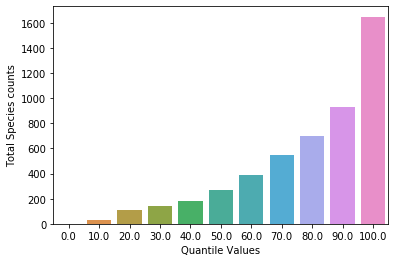

In [7]:
# Finding the Outliers using quantile. 
quan_fish = fish['Weight'].quantile([0, 0.1, 0.2, 0.3 ,0.4 , 0.5, 0.6 ,0.7, 0.8, 0.9, 1])
quan_fish = pd.DataFrame(quan_fish)
quan_fish.index = quan_fish.index*100 
sns.barplot(x=quan_fish.index, y=quan_fish['Weight'])
plt.xlabel('Quantile Values')
plt.ylabel('Total Species counts')
plt.show()

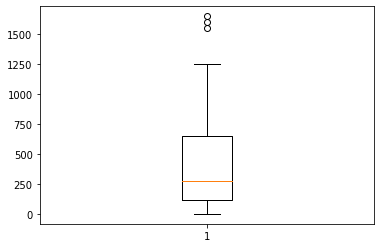

In [8]:
# Plotting using Box plot 
plt.boxplot(fish.Weight)
plt.show()

**Looks like the Box plot shows a decent plot. There are no serious outliers **

In [9]:
# Finding invalid weights 
fish[fish['Weight'] <= 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


**Fish weight cannot be 0 . Hence this a is data issue and needs to be fixed **

In [10]:
#Fixing the outlier. Mean of the species weight is taken and assigned
mean_fish = fish['Weight'][(fish['Species'] =='Roach') & (fish['Weight'] != 0)].mean()
fish.loc[40,'Weight'] = mean_fish
fish.loc[40,'Weight']

160.05263157894737

**Issue record is fixed by taking the mean weight of Species Roach**

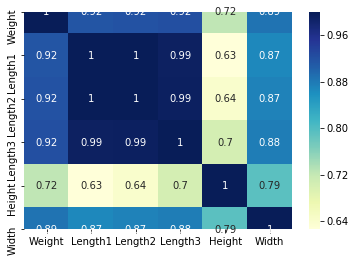

In [17]:
# Plotting the correlation in heatmap:
sns.heatmap(fish.corr(), annot=True ,cmap='YlGnBu')
plt.show()

**Good correlation for weight is seen in almost all features**

In [12]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [14]:
fish.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

## REGRESSION USING OLS: METHOD 1

In [16]:
import statsmodels.api as sm
x=fish.drop(['Species','Weight'],axis=1)
y=fish['Weight']
x_constant = sm.add_constant(x)
model1 = sm.OLS(y, x_constant).fit()
model1.summary()

C:\Users\ankur\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     237.4
Date:                Sun, 12 Jul 2020   Prob (F-statistic):           3.51e-70
Time:                        09:23:03   Log-Likelihood:                -987.20
No. Observations:                 159   AIC:                             1986.
Df Residuals:                     153   BIC:                             2005.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -496.6172     29.431    -16.874      0.000    -554.761    -438.474
Length1       64.0767     40.017      1.601      0.111     -14.980     143.133
Length2       -9.2801     41.559     -0.223      0.824     -91.384      72.824
Length3      -28.0586     17.270     -1.625      0.106     -62.177       6.060
Height        27.9015      8.688      3.212      0.002      10.739      45.065
Width         23.4747     20.274      1.158      0.249     -16.579      63.529
==============================================================================
Omnibus:                       21.793   Durbin-Watson:                   0.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.147
Skew:                           0.802   Prob(JB):                     4.69e-07
Kurtosis:                       4.351   Cond. No.                         315.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## REGRESSION USING OLS: METHOD 2

In [10]:
model_l1 = sm.ols(formula='Weight ~ Length1+Length2+Length3+Height+Width', data=fish)
fit_l1 = model_l1.fit()
fit_l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     237.4
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           3.51e-70
Time:                        09:05:22   Log-Likelihood:                -987.20
No. Observations:                 159   AIC:                             1986.
Df Residuals:                     153   BIC:                             2005.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -496.6172     29.431    -16.874      0.000    -554.761    -438.474
Length1       64.0767     40.017      1.601      0.111     -14.980     143.133
Length2       -9.2801     41.559     -0.223      0.824     -91.384      72.824
Length3      -28.0586     17.270     -1.625      0.106     -62.177       6.060
Height        27.9015      8.688      3.212      0.002      10.739      45.065
Width         23.4747     20.274      1.158      0.249     -16.579      63.529
==============================================================================
Omnibus:                       21.793   Durbin-Watson:                   0.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.147
Skew:                           0.802   Prob(JB):                     4.69e-07
Kurtosis:                       4.351   Cond. No.                         315.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-Squared value is 88% . But P values are higher for Length2**

In [11]:
# Dropping high PValues . i.e Length2
model_l1 = sm.ols(formula='Weight ~ Length1+Length3+Height+Width', data=fish)
fit_l1 = model_l1.fit()
fit_l1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     298.5
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.95e-71
Time:                        09:05:22   Log-Likelihood:                -987.23
No. Observations:                 159   AIC:                             1984.
Df Residuals:                     154   BIC:                             2000.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -497.3904     29.136    -17.071      0.000    -554.949    -439.832
Length1       56.0894     17.885      3.136      0.002      20.758      91.421
Length3      -29.6286     15.725     -1.884      0.061     -60.694       1.436
Height        28.1254      8.603      3.269      0.001      11.131      45.120
Width         22.0572     19.195      1.149      0.252     -15.863      59.978
==============================================================================
Omnibus:                       21.615   Durbin-Watson:                   0.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.585
Skew:                           0.803   Prob(JB):                     6.21e-07
Kurtosis:                       4.316   Cond. No.                         151.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Width has still more P value**

In [12]:
# Dropping high PValues . i.e Width
model_l1 = sm.ols(formula='Weight ~ Length1+Length3+Height', data=fish)
fit_l1 = model_l1.fit()
fit_l1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     396.8
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.73e-72
Time:                        09:05:22   Log-Likelihood:                -987.91
No. Observations:                 159   AIC:                             1984.
Df Residuals:                     155   BIC:                             1996.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -488.4923     28.117    -17.373      0.000    -544.035    -432.949
Length1       70.0465     13.141      5.330      0.000      44.087      96.006
Length3      -40.7281     12.422     -3.279      0.001     -65.265     -16.191
Height        35.7955      5.433      6.589      0.000      25.064      46.527
==============================================================================
Omnibus:                       15.416   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.806
Skew:                           0.634   Prob(JB):                     8.25e-05
Kurtosis:                       4.110   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-Squared value is 88.5% and P values negligible.**

In [13]:
# Defining a function to calculate VIF beltween Length1 , Length3 & Height
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [14]:
# Calculating VIF values for all attributes
fish_d = fish.drop(['Species','Length2','Width'],axis = 1)
vif_cal(input_data=fish_d, dependent_col="Weight")

Length1  VIF =  182.09
Length3  VIF =  219.46
Height  VIF =  5.72


**We see Length3 has highest VIF**

In [15]:
#Checking model by removing Length3
model_l1 = sm.ols(formula='Weight ~ Length1+Height', data=fish)
fit_l1 = model_l1.fit()
fit_l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     555.1
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           1.17e-71
Time:                        09:05:22   Log-Likelihood:                -993.24
No. Observations:                 159   AIC:                             1992.
Df Residuals:                     156   BIC:                             2002.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -499.5577     28.773    -17.362      0.000    -556.393    -442.722
Length1       27.1534      1.286     21.107      0.000      24.612      29.695
Height        20.7547      3.000      6.918      0.000      14.828      26.681
==============================================================================
Omnibus:                        5.358   Durbin-Watson:                   0.434
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.901
Skew:                           0.382   Prob(JB):                       0.0863
Kurtosis:                       3.396   Cond. No.                         85.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

![](http://)**R-squared and P values still looks good.**

In [16]:
# Checking the VIF's of model features by deleting Length3
fish_d = fish.drop(['Species','Length2','Width','Length3'],axis = 1)
vif_cal(input_data=fish_d, dependent_col="Weight")

Length1  VIF =  1.64
Height  VIF =  1.64


**Vif's are also good < 5 . Hence Weights can be predicted using Length1 and Height**

In [17]:
# Splitting the data for Training and Testing
y = fish['Weight']
X = fish.loc[:,['Length1','Height']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
# Creating a LinearRegression model for Training data
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
#Checking the coefficients 
lr.intercept_
lr.coef_

array([26.42676601, 20.94874998])

In [20]:
# Predicting the Weights for same Train data and checking R2 score against the same
y_pred = lr.predict(X_train)
r2_score(y_train,y_pred)

0.8680892475214407

R2 score comes to 86.8

In [21]:
# Checking the Mean of R2 scores for 10 random sample selecrions
r2_val_score_train = cross_val_score(lr, X_train, y_train, cv=10, scoring='r2')
r2_val_score_train
r2_val_score_train.mean()

0.8510385805364061

85% is the mean r2 value

In [22]:
#Valuating the R2 score in Test data
y_pred_test = lr.predict(X_test)
r2_score(y_test,y_pred_test)


0.90535629793849

Test data shows good R2 score i.e 90% better that 85% in Train data. This looks good.